In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

In [4]:
!pip install yfinance

In [5]:
import yfinance as yf
from datetime import datetime, timedelta

def request_stock_price_list(symbol, start_date, end_date):
    # Define the ticker symbol
    ticker = yf.Ticker(symbol)

#Download historical data
    data123 = ticker.history(period="40mo", start=start_date, end=end_date)

#Rename columns to match your original code
    data123.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"}, inplace=True)

#Reset index and add a 'date' column
    data123.reset_index(inplace=True)

    return data123

#Example usage:
symbol = "AAPL"  # Replace with the stock symbol you want
start_date = datetime.today() - timedelta(days=(30*40) + 1)  # Replace with your desired start date
end_date = datetime.today() - timedelta(days=1)   # Replace with your desired end date

data = request_stock_price_list(symbol, start_date, end_date)
data.head()  # Display the first few rows of the data

,Date,open,high,low,close,volume,Dividends,Stock Splits
0,2020-09-01 00:00:00-04:00,130.231361,132.232515,128.043840,131.624313,151948100,0.0,0.0
1,2020-09-02 00:00:00-04:00,134.969350,135.351921,124.581059,128.897247,200119000,0.0,0.0
2,2020-09-03 00:00:00-04:00,124.492760,126.385992,118.204847,118.577606,257599600,0.0,0.0
3,2020-09-04 00:00:00-04:00,117.783035,121.343891,108.777885,118.656082,332607200,0.0,0.0
4,2020-09-08 00:00:00-04:00,111.779609,116.723614,110.533802,110.671135,231366600,0.0,0.0


In [6]:
data.tail()

,Date,open,high,low,close,volume,Dividends,Stock Splits
824,2023-12-11 00:00:00-05:00,193.110001,193.490005,191.419998,193.179993,60943700,0.0,0.0
825,2023-12-12 00:00:00-05:00,193.080002,194.720001,191.720001,194.710007,52696900,0.0,0.0
826,2023-12-13 00:00:00-05:00,195.089996,198.000000,194.850006,197.960007,70404200,0.0,0.0
827,2023-12-14 00:00:00-05:00,198.020004,199.619995,196.160004,198.110001,66831600,0.0,0.0
828,2023-12-15 00:00:00-05:00,197.529999,198.399994,197.000000,197.570007,128256700,0.0,0.0


In [7]:
data.shape

(829, 8)

In [8]:
#data = pd.read_csv(r'C:\Users\sjaya\Downloads\data.csv')
#data.head()

In [9]:
data.isnull().sum()


Date            0
open            0
high            0
low             0
close           0
volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [10]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

C:\Users\sjaya\AppData\Local\Temp\ipykernel_15532\2985681012.py:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


,Date,open,high,low,close,volume,Dividends,Stock Splits
0,2020-09-01 00:00:00-04:00,130.231361,132.232515,128.043840,131.624313,151948100,0.0,0.0
1,2020-09-02 00:00:00-04:00,134.969350,135.351921,124.581059,128.897247,200119000,0.0,0.0
2,2020-09-03 00:00:00-04:00,124.492760,126.385992,118.204847,118.577606,257599600,0.0,0.0
3,2020-09-04 00:00:00-04:00,117.783035,121.343891,108.777885,118.656082,332607200,0.0,0.0
4,2020-09-08 00:00:00-04:00,111.779609,116.723614,110.533802,110.671135,231366600,0.0,0.0


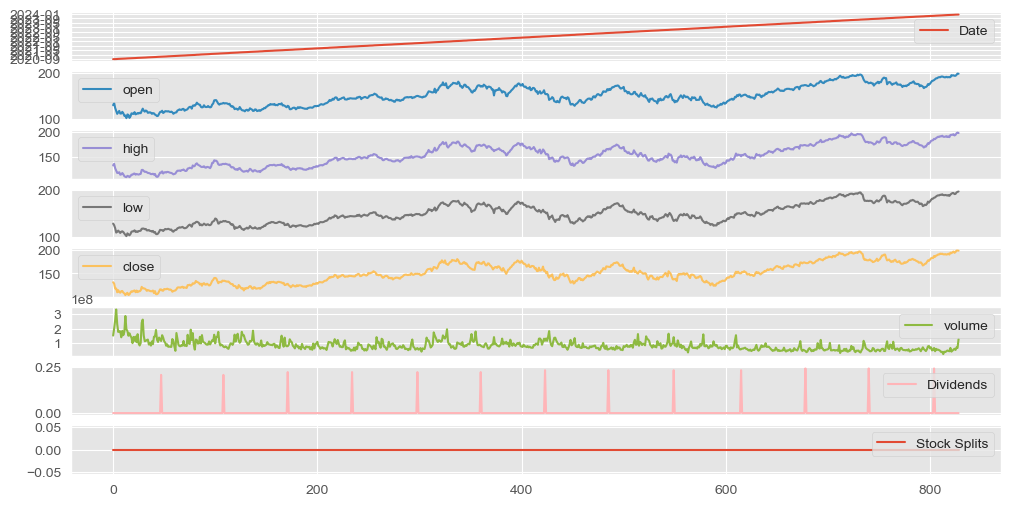

C:\Users\sjaya\AppData\Local\Temp\ipykernel_15532\1586795871.py:10: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe(include='all').T


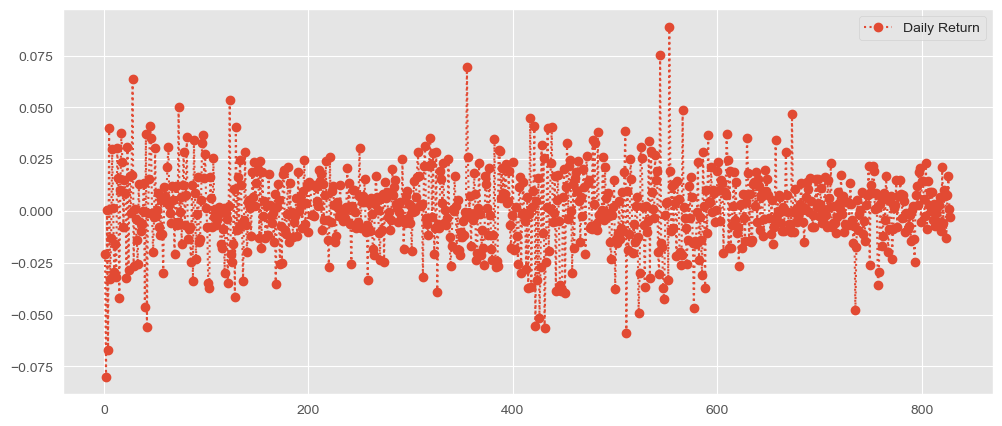

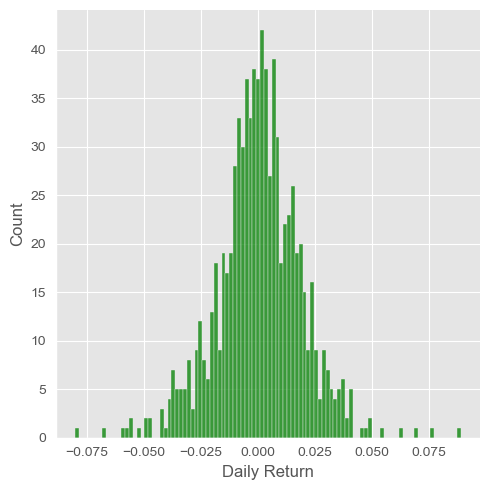

C:\Users\sjaya\AppData\Local\Temp\ipykernel_15532\1586795871.py:34: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data.fillna(data.mean(), inplace=True)


                         Date        open        high         low       close  \
0   2020-09-01 00:00:00-04:00  130.231361  132.232515  128.043840  131.624313   
1   2020-09-02 00:00:00-04:00  134.969350  135.351921  124.581059  128.897247   
2   2020-09-03 00:00:00-04:00  124.492760  126.385992  118.204847  118.577606   
3   2020-09-04 00:00:00-04:00  117.783035  121.343891  108.777885  118.656082   
4   2020-09-08 00:00:00-04:00  111.779609  116.723614  110.533802  110.671135   
..                        ...         ...         ...         ...         ...   
824 2023-12-11 00:00:00-05:00  193.110001  193.490005  191.419998  193.179993   
825 2023-12-12 00:00:00-05:00  193.080002  194.720001  191.720001  194.710007   
826 2023-12-13 00:00:00-05:00  195.089996  198.000000  194.850006  197.960007   
827 2023-12-14 00:00:00-05:00  198.020004  199.619995  196.160004  198.110001   
828 2023-12-15 00:00:00-05:00  197.529999  198.399994  197.000000  197.570007   

        volume  Dividends  

Date               0
open               0
high               0
low                0
close              0
volume             0
Dividends          0
Stock Splits       0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

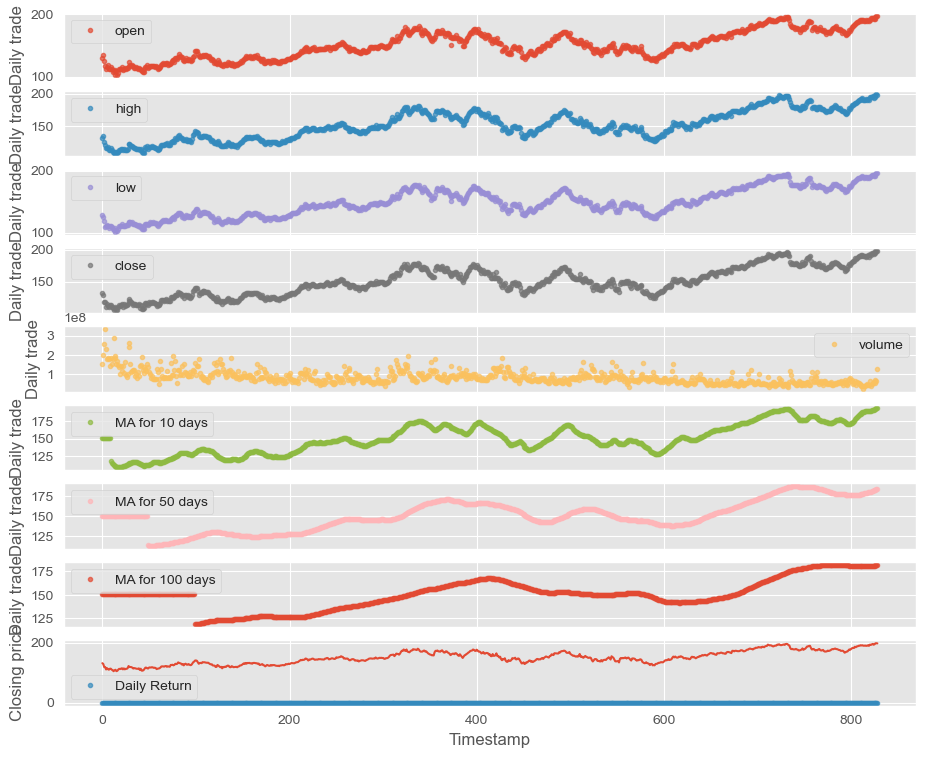

In [11]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['close'],ma).mean()

data['Daily Return'] = data['close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['open', 'high', 'low','close','volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

                         Date        open        high         low       close  \
0   2020-09-01 00:00:00-04:00  130.231361  132.232515  128.043840  131.624313   
1   2020-09-02 00:00:00-04:00  134.969350  135.351921  124.581059  128.897247   
2   2020-09-03 00:00:00-04:00  124.492760  126.385992  118.204847  118.577606   
3   2020-09-04 00:00:00-04:00  117.783035  121.343891  108.777885  118.656082   
4   2020-09-08 00:00:00-04:00  111.779609  116.723614  110.533802  110.671135   
..                        ...         ...         ...         ...         ...   
824 2023-12-11 00:00:00-05:00  193.110001  193.490005  191.419998  193.179993   
825 2023-12-12 00:00:00-05:00  193.080002  194.720001  191.720001  194.710007   
826 2023-12-13 00:00:00-05:00  195.089996  198.000000  194.850006  197.960007   
827 2023-12-14 00:00:00-05:00  198.020004  199.619995  196.160004  198.110001   
828 2023-12-15 00:00:00-05:00  197.529999  198.399994  197.000000  197.570007   

        volume  Dividends  

,count,mean,std,min,25%,50%,75%,max
open,829.0,1.504024e+02,2.205669e+01,1.025488e+02,1.328751e+02,1.480724e+02,1.692540e+02,1.980200e+02
high,829.0,1.521166e+02,2.208181e+01,1.080912e+02,1.339444e+02,1.497480e+02,1.709295e+02,1.996200e+02
low,829.0,1.487843e+02,2.215044e+01,1.011363e+02,1.312217e+02,1.467348e+02,1.674962e+02,1.970000e+02
close,829.0,1.505204e+02,2.215605e+01,1.048050e+02,1.325798e+02,1.483055e+02,1.692462e+02,1.981100e+02
volume,829.0,8.506773e+07,3.502126e+07,2.404830e+07,6.075020e+07,7.733820e+07,9.894460e+07,3.326072e+08
Dividends,829.0,3.534379e-03,2.805477e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e-01
Stock Splits,829.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
MA for 10 days,829.0,1.504328e+02,2.153355e+01,1.086769e+02,1.332956e+02,1.482424e+02,1.686758e+02,1.946680e+02
MA for 50 days,829.0,1.504925e+02,1.892393e+01,1.129109e+02,1.385607e+02,1.498230e+02,1.647951e+02,1.869483e+02
MA for 100 days,829.0,1.507001e+02,1.627486e+01,1.187007e+02,1.420917e+02,1.507001e+02,1.600164e+02,1.821695e+02


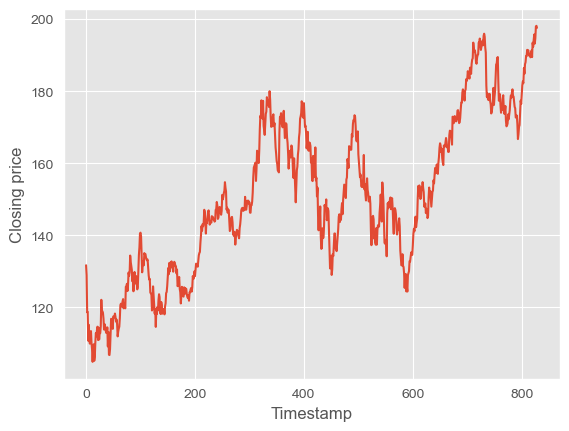

In [12]:
plt.plot(data['close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [13]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

581
146


In [34]:
train_X

array([[[[ 0.        ],
         [ 0.2872321 ],
         [ 0.66204708],
         ...,
         [-0.42804331],
         [-0.21241012],
         [-0.50833954]]],


       [[[ 0.        ],
         [ 0.29117902],
         [-0.10183634],
         ...,
         [-0.38815239],
         [-0.61804832],
         [-0.45324527]]],


       [[[ 0.        ],
         [-0.30438487],
         [-0.46801963],
         ...,
         [-0.70418379],
         [-0.57654615],
         [-0.57120261]]],


       ...,


       [[[ 0.        ],
         [-0.02713569],
         [ 0.07959785],
         ...,
         [-0.32500634],
         [-0.3778982 ],
         [-0.42836646]]],


       [[[ 0.        ],
         [ 0.10971061],
         [ 0.00541502],
         ...,
         [-0.36054618],
         [-0.41242213],
         [-0.51872204]]],


       [[[ 0.        ],
         [-0.0939845 ],
         [-0.25734452],
         ...,
         [-0.47051252],
         [-0.56630318],
         [-0.50993506]]]])

In [15]:
!pip install tensorflow


In [16]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)




Epoch 1/40



15/15 [==============================] - 12s 141ms/step - loss: 0.0127 - mse: 0.0127 - mae: 0.0904 - val_loss: 0.0072 - val_mse: 0.0072 - val_mae: 0.0716
Epoch 2/40
15/15 [==============================] - 0s 12ms/step - loss: 0.0065 - mse: 0.0065 - mae: 0.0671 - val_loss: 0.0056 - val_mse: 0.0056 - val_mae: 0.0598
Epoch 3/40
15/15 [==============================] - 0s 12ms/step - loss: 0.0051 - mse: 0.0051 - mae: 0.0602 - val_loss: 0.0045 - val_mse: 0.0045 - val_mae: 0.0546
Epoch 4/40
15/15 [==============================] - 0s 12ms/step - loss: 0.0043 - mse: 0.0043 - mae: 0.0547 - val_loss: 0.0044 - val_mse: 0.0044 - val_mae: 0.0554
Epoch 5/40
15/15 [==============================] - 0s 13ms/step - loss: 0.0047 - mse: 0.0047 - mae: 0.0576 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0499
Epoch 6/40
15/15 [==============================] - 0s 12ms/step - loss: 0.0040 - mse: 0.0040 - mae: 0.0514 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0475
Epoch 7/40
15/

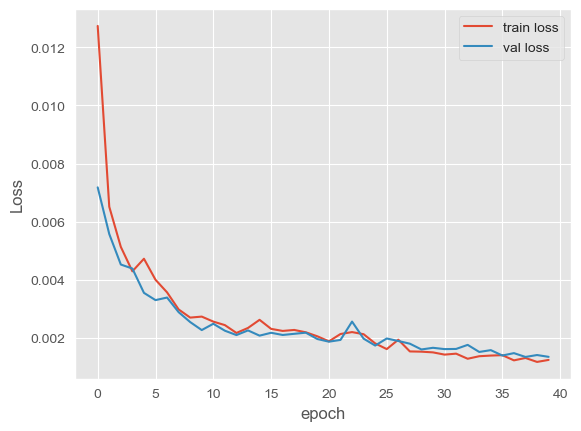

In [17]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

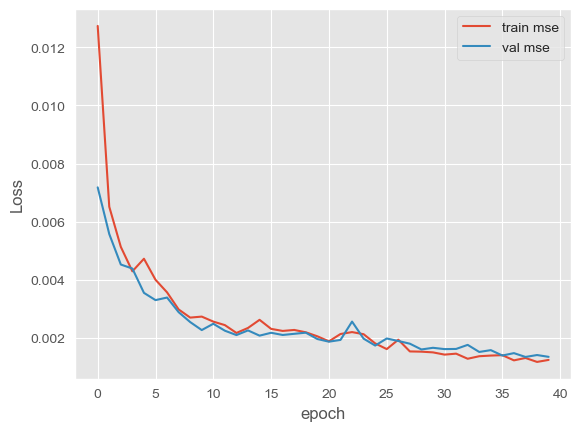

In [18]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()


In [19]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [20]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 5ms/step - loss: 0.0013 - mse: 0.0013 - mae: 0.0284    


[0.0013439941685646772, 0.0013439941685646772, 0.028380732983350754]

In [21]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.923260
R2 Score: 0.923260
Max Error: 0.104132


5/5 [==============================] - 0s 4ms/step


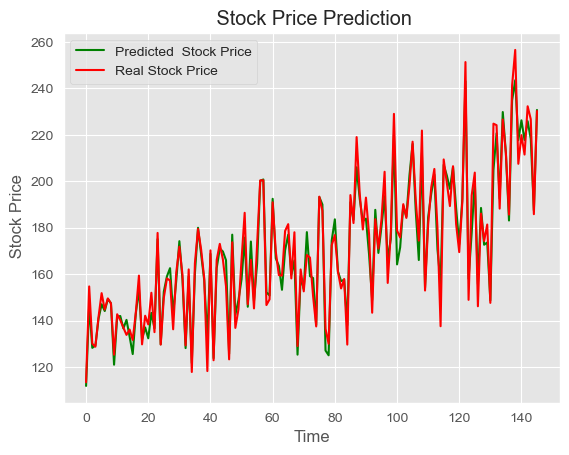

In [22]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [23]:
import numpy as np

# Assuming 'predicted' and 'test_label' are your numpy arrays

# Initialize a counter for matching trends over specific three-day windows
matching_trends = 0

# Iterate through the arrays in steps of three days
for i in range(0, len(predicted) - 2, 3):
    # Calculate the difference over the three-day window for both arrays
    test_label_diff = test_label[i + 2] - test_label[i]
    predicted_diff = predicted[i + 2] - predicted[i]

    # Check if the differences have the same sign (both positive or both negative)
    if np.sign(test_label_diff) == np.sign(predicted_diff):
        matching_trends += 3

# 'matching_trends' now contains the count of specific three-day periods where the trend matched
print(matching_trends)

138


In [24]:
data.tail()

,Date,open,high,low,close,volume,Dividends,Stock Splits,MA for 10 days,MA for 50 days,MA for 100 days,Daily Return
824,2023-12-11 00:00:00-05:00,193.110001,193.490005,191.419998,193.179993,60943700,0.0,0.0,191.928999,181.780870,181.365914,-0.012927
825,2023-12-12 00:00:00-05:00,193.080002,194.720001,191.720001,194.710007,52696900,0.0,0.0,192.360001,182.204643,181.398725,0.007920
826,2023-12-13 00:00:00-05:00,195.089996,198.000000,194.850006,197.960007,70404200,0.0,0.0,193.219002,182.720379,181.455957,0.016691
827,2023-12-14 00:00:00-05:00,198.020004,199.619995,196.160004,198.110001,66831600,0.0,0.0,194.035002,183.213949,181.506012,0.000758
828,2023-12-15 00:00:00-05:00,197.529999,198.399994,197.000000,197.570007,128256700,0.0,0.0,194.668002,183.671752,181.541890,-0.002726


In [25]:
# First we need to save a model
model.save("model.h5")

C:\Users\sjaya\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [27]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed (TimeDist  (None, 1, 98, 64)         256       
 ributed)                                                        
                                                                 
 time_distributed_1 (TimeDi  (None, 1, 49, 64)         0         
 stributed)                                                      
                                                                 
 time_distributed_2 (TimeDi  (None, 1, 47, 128)        24704     
 stributed)                                                      
                                                                 
 time_distributed_3 (TimeDi  (None, 1, 23, 128)        0         
 stributed)                                                      
                                                                 
 time_distributed_4 (TimeDi  (None, 1, 21, 64)         2

In [28]:
# For data preprocessing and analysis part
#data2 = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/aaoi.us.txt')
#data2 = pd.read_csv('../input/nifty50-stock-market-data/SBIN.csv')
#data2 = pd.read_csv('../input/stock-market-data/stock_market_data/nasdaq/csv/ACTG.csv')
data2 = request_stock_price_list(symbol, start_date, end_date)
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

           open        high         low       close     volume  Dividends  \
0    130.231361  132.232515  128.043840  131.624313  151948100        0.0   
1    134.969350  135.351921  124.581059  128.897247  200119000        0.0   
2    124.492760  126.385992  118.204847  118.577606  257599600        0.0   
3    117.783035  121.343891  108.777885  118.656082  332607200        0.0   
4    111.779609  116.723614  110.533802  110.671135  231366600        0.0   
..          ...         ...         ...         ...        ...        ...   
824  193.110001  193.490005  191.419998  193.179993   60943700        0.0   
825  193.080002  194.720001  191.720001  194.710007   52696900        0.0   
826  195.089996  198.000000  194.850006  197.960007   70404200        0.0   
827  198.020004  199.619995  196.160004  198.110001   66831600        0.0   
828  197.529999  198.399994  197.000000  197.570007  128256700        0.0   

     Stock Splits  
0             0.0  
1             0.0  
2             0

C:\Users\sjaya\AppData\Local\Temp\ipykernel_15532\1640598883.py:11: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  data2.fillna(data.mean(), inplace=True)


581
146


In [29]:
model.evaluate(test_X, test_Y)

5/5 [==============================] - 0s 5ms/step - loss: 0.2447 - mse: 0.2447 - mae: 0.3612


[0.24468766152858734, 0.24468766152858734, 0.36115211248397827]

5/5 [==============================] - 0s 4ms/step


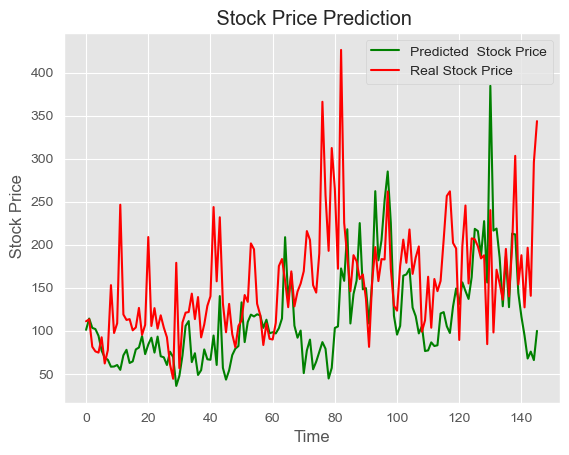

In [30]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()